In [1]:
import sys
import os
from glob import glob
sys.path.append("../NEAT")
from NEATModels import NEATStaticDetection, nets
from NEATModels.Staticconfig  import StaticNeatConfig
from NEATUtils import helpers
from NEATUtils.helpers import save_json, load_json
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

Using TensorFlow backend.


In [2]:
NpzDirectory = '/data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2OYoloneatV0/'
TrainModelName = 'S54bin2.npz'
ValidationModelName = 'S54bin2Val.npz'


ModelDir = '/data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/'
#Model name based on wether it is residual or sequntial ONEAT network
Model_Name = 'ORnetbin2d29V0.h5'
StaticCategoriesJson = ModelDir + 'StaticCategories.json'
KeyCategories = load_json(StaticCategoriesJson)

StaticCordJson = ModelDir + 'StaticCord.json'
KeyCord = load_json(StaticCordJson)

#Neural network parameters





In [3]:
#For ORNET use residual = True and for OSNET use residual = False
residual = True
#NUmber of starting convolutional filters, is doubled down with increasing depth
startfilter = 32
#CNN network start layer, mid layers and lstm layer kernel size
start_kernel = 3
mid_kernel = 3
#Network depth has to be 9n + 2, n= 3 or 4 is optimal for Notum dataset
depth = 29
#Size of the gradient descent length vector, start small and use callbacks to get smaller when reaching the minima
learning_rate = 1.0E-4
#For stochastic gradient decent, the batch size used for computing the gradients
batch_size = 100
# use softmax for single event per box, sigmoid for multi event per box
multievent = False
# Trainng image size
yoloV0 = True
ImageX = 54
ImageY = 54
#Training epochs, longer the better with proper chosen learning rate
epochs = 250
nboxes = 5

In [4]:
config = StaticNeatConfig(residual = residual, depth = depth, start_kernel = start_kernel, mid_kernel = mid_kernel,
                         startfiler = startfilter, gridX = 1, gridY = 1, ImageX = ImageX, ImageY = ImageY, nboxes = nboxes, 
                         epochs = epochs, categories = len(KeyCategories), box_vector = len(KeyCord), learning_rate = learning_rate,
                         batch_size = batch_size, ModelName = Model_Name, multievent = multievent)

config_json = config.to_json()
show = True
print(config)
save_json(config_json, ModelDir + Model_Name + '_Parameter.json')

StaticNeatConfig(ImageX=54, ImageY=54, ModelName='ORnetbin2d29V0.h5', batch_size=100, box_vector=4, categories=4, depth=29, epochs=250, gridX=1, gridY=1, learning_rate=0.0001, mid_kernel=3, multievent=False, nboxes=5, residual=True, start_kernel=3, startfilter=32)


number of  images:	 36076
image size (2D):		 (54, 54)
axes:				 SXYC
channels in / out:		 1
number of  images:	 1899
image size (2D):		 (54, 54)
axes:				 SXYC
channels in / out:		 1
loading weights
(36076, 1, 1, 24) 5














Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 1 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 320         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 128         conv2d_1[0][0]                   
_________________________________________________________

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 36076 samples, validate on 1899 samples
Epoch 1/250
36076/36076 [==============================] - 55s 2ms/step - loss: 1.1569 - acc: 0.9991 - val_loss: 1.2991 - val_acc: 0.9753

Epoch 00001: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d29V0.h5
{'val_loss': 1.299081446749088, 'val_acc': 0.9752501447995504, 'loss': 1.1568612348003706, 'acc': 0.9990852653140939, 'lr': 1e-04}


<Figure size 432x288 with 0 Axes>

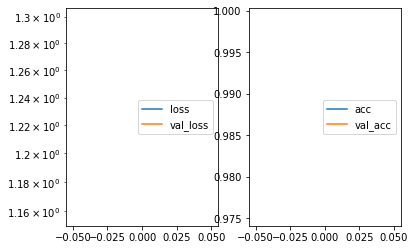

Predicted cell: NonMatureP1 Probability: [[0.99991846]]
True Cell type: NonMatureP1
X [[0.38819867]]
True positional value X 0.5
Y [[0.417427]]
True positional value Y 0.5
H [[0.20856619]]
True positional value H 0.25925925925925924
W [[0.17459056]]
True positional value W 0.24074074074074073


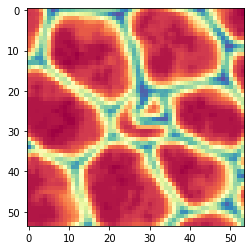

Epoch 2/250
36076/36076 [==============================] - 47s 1ms/step - loss: 1.1553 - acc: 0.9991 - val_loss: 1.3495 - val_acc: 0.9605

Epoch 00002: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d29V0.h5
{'val_loss': 1.3494627639580676, 'val_acc': 0.9605055344676017, 'loss': 1.155334342661421, 'acc': 0.9991407037799064, 'lr': 1e-04}


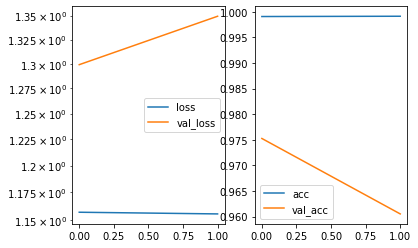

Predicted cell: NonMatureP1 Probability: [[0.999067]]
True Cell type: NonMatureP1
X [[0.30074915]]
True positional value X 0.3148148148148148
Y [[0.36387342]]
True positional value Y 0.3148148148148148
H [[0.31224337]]
True positional value H 0.2962962962962963
W [[0.36664408]]
True positional value W 0.3333333333333333


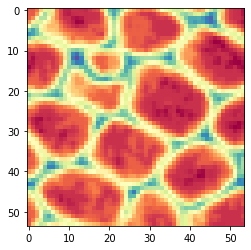

Epoch 3/250
36076/36076 [==============================] - 47s 1ms/step - loss: 1.1575 - acc: 0.9974 - val_loss: 1.2989 - val_acc: 0.9742

Epoch 00003: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d29V0.h5
{'val_loss': 1.2988561279463604, 'val_acc': 0.9741969536391605, 'loss': 1.157451879292188, 'acc': 0.9973666728739068, 'lr': 1e-04}


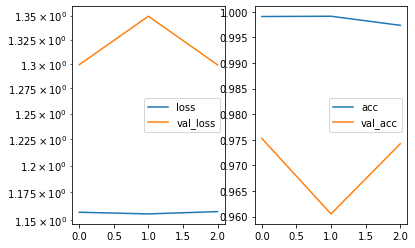

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.5091832]]
True positional value X 0.6851851851851852
Y [[0.4727437]]
True positional value Y 0.6851851851851852
H [[0.20166011]]
True positional value H 0.25925925925925924
W [[0.15184365]]
True positional value W 0.25925925925925924


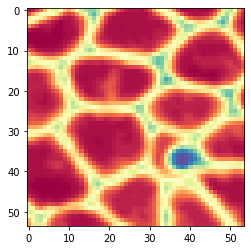

Epoch 4/250
36076/36076 [==============================] - 47s 1ms/step - loss: 1.1526 - acc: 0.9991 - val_loss: 1.2907 - val_acc: 0.9747

Epoch 00004: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d29V0.h5
{'val_loss': 1.2907099697450515, 'val_acc': 0.9747235450448332, 'loss': 1.1525500740123595, 'acc': 0.9990852653140939, 'lr': 1e-04}


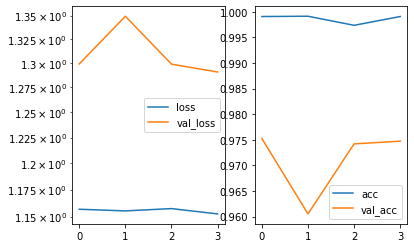

Predicted cell: Normal Probability: [[0.99848986]]
True Cell type: Normal
X [[0.4634038]]
True positional value X 0.5
Y [[0.4411729]]
True positional value Y 0.5
H [[0.23195922]]
True positional value H 0.16666666666666666
W [[0.24874525]]
True positional value W 0.2222222222222222


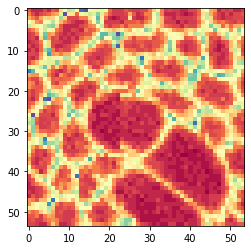

Epoch 5/250
36076/36076 [==============================] - 47s 1ms/step - loss: 1.1501 - acc: 0.9990 - val_loss: 1.2889 - val_acc: 0.9742

Epoch 00005: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d29V0.h5
{'val_loss': 1.2888911457172252, 'val_acc': 0.9741969536391605, 'loss': 1.1501197739997768, 'acc': 0.9990021076153752, 'lr': 1e-04}


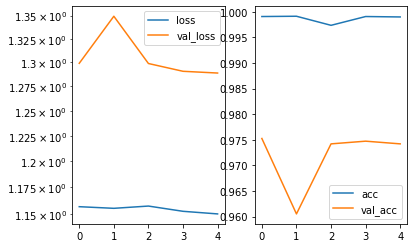

Predicted cell: MatureP1 Probability: [[0.9998356]]
True Cell type: MatureP1
X [[0.5960533]]
True positional value X 0.6851851851851852
Y [[0.31444767]]
True positional value Y 0.3148148148148148
H [[0.22565778]]
True positional value H 0.4074074074074074
W [[0.2814373]]
True positional value W 0.3888888888888889


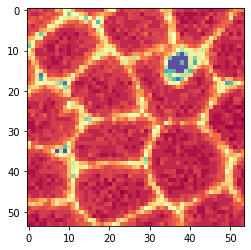

Epoch 6/250
36076/36076 [==============================] - 47s 1ms/step - loss: 1.1482 - acc: 0.9990 - val_loss: 1.2881 - val_acc: 0.9763

Epoch 00006: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d29V0.h5
{'val_loss': 1.2881191068099886, 'val_acc': 0.9763033286466795, 'loss': 1.1481753567499893, 'acc': 0.9990298268482815, 'lr': 1e-04}


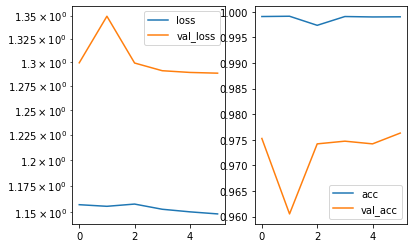

Predicted cell: MatureP1 Probability: [[0.99999714]]
True Cell type: MatureP1
X [[0.37366986]]
True positional value X 0.5
Y [[0.33266735]]
True positional value Y 0.3148148148148148
H [[0.20999393]]
True positional value H 0.09259259259259259
W [[0.3071129]]
True positional value W 0.1111111111111111


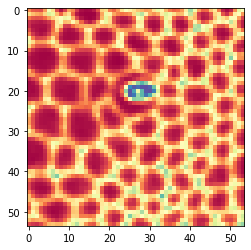

Epoch 7/250
36076/36076 [==============================] - 47s 1ms/step - loss: 1.1462 - acc: 0.9991 - val_loss: 1.2828 - val_acc: 0.9774

Epoch 00007: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d29V0.h5
{'val_loss': 1.282757208057301, 'val_acc': 0.977356514565376, 'loss': 1.1461521725205732, 'acc': 0.9991129845470001, 'lr': 1e-04}


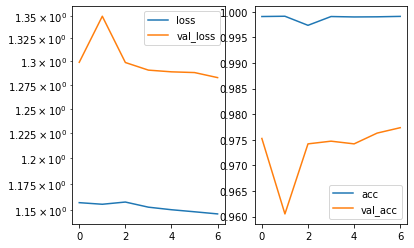

Predicted cell: Normal Probability: [[0.99999666]]
True Cell type: Normal
X [[0.43776044]]
True positional value X 0.5
Y [[0.48312044]]
True positional value Y 0.5
H [[0.0717802]]
True positional value H 0.2037037037037037
W [[0.10724118]]
True positional value W 0.16666666666666666


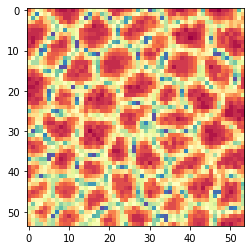

Epoch 8/250
36076/36076 [==============================] - 47s 1ms/step - loss: 1.1445 - acc: 0.9991 - val_loss: 1.2806 - val_acc: 0.9753

Epoch 00008: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d29V0.h5
{'val_loss': 1.2806430090220744, 'val_acc': 0.9752501437637666, 'loss': 1.1445498497949522, 'acc': 0.9991407037799064, 'lr': 1e-04}


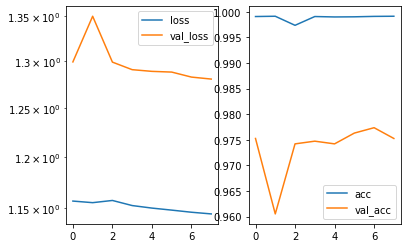

Predicted cell: NonMatureP1 Probability: [[0.9999964]]
True Cell type: NonMatureP1
X [[0.38927034]]
True positional value X 0.5
Y [[0.26097447]]
True positional value Y 0.3148148148148148
H [[0.2629]]
True positional value H 0.3148148148148148
W [[0.28898984]]
True positional value W 0.3333333333333333


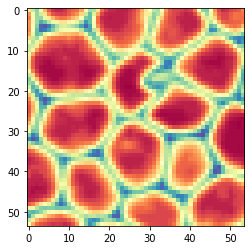

Epoch 9/250
36076/36076 [==============================] - 47s 1ms/step - loss: 1.1427 - acc: 0.9991 - val_loss: 1.2957 - val_acc: 0.9710

Epoch 00009: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d29V0.h5
{'val_loss': 1.2956782969253322, 'val_acc': 0.9710373968874674, 'loss': 1.1426913235718612, 'acc': 0.9991129845470001, 'lr': 1e-04}


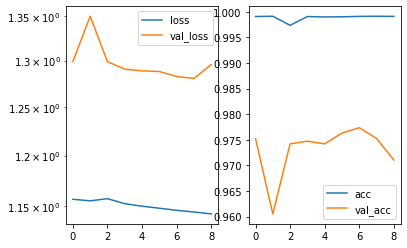

Predicted cell: Normal Probability: [[0.99997056]]
True Cell type: Normal
X [[0.36419326]]
True positional value X 0.5
Y [[0.35556448]]
True positional value Y 0.5
H [[0.27948338]]
True positional value H 0.24074074074074073
W [[0.37995094]]
True positional value W 0.4074074074074074


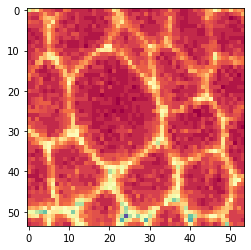

Epoch 10/250
36076/36076 [==============================] - 47s 1ms/step - loss: 1.1414 - acc: 0.9991 - val_loss: 1.2756 - val_acc: 0.9763

Epoch 00010: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d29V0.h5
{'val_loss': 1.2756268901533676, 'val_acc': 0.9763033296824631, 'loss': 1.1414328437380734, 'acc': 0.9990852652678324, 'lr': 1e-04}


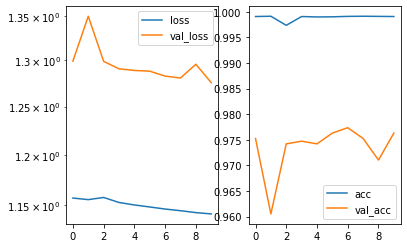

Predicted cell: MacroCheate Probability: [[0.9999994]]
True Cell type: MacroCheate
X [[0.5457209]]
True positional value X 0.6851851851851852
Y [[0.5312974]]
True positional value Y 0.6851851851851852
H [[0.58099705]]
True positional value H 0.6296296296296297
W [[0.73220557]]
True positional value W 0.9444444444444444


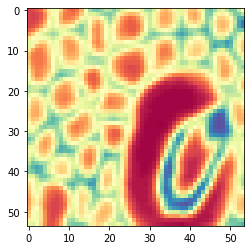

Epoch 11/250
36076/36076 [==============================] - 47s 1ms/step - loss: 1.1397 - acc: 0.9991 - val_loss: 1.2774 - val_acc: 0.9747

Epoch 00011: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d29V0.h5
{'val_loss': 1.2773715795624438, 'val_acc': 0.9747235513223103, 'loss': 1.139694039976799, 'acc': 0.9990575460811877, 'lr': 1e-04}


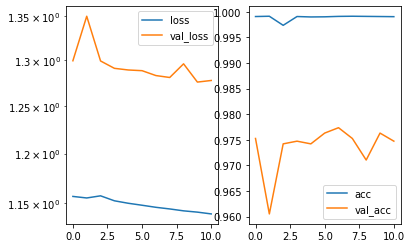

Predicted cell: MacroCheate Probability: [[0.9999993]]
True Cell type: MacroCheate
X [[0.50435966]]
True positional value X 0.6851851851851852
Y [[0.35595185]]
True positional value Y 0.5
H [[0.34448323]]
True positional value H 0.5
W [[0.3943475]]
True positional value W 0.5


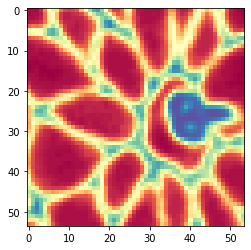

Epoch 12/250
36076/36076 [==============================] - 47s 1ms/step - loss: 1.1382 - acc: 0.9991 - val_loss: 1.2887 - val_acc: 0.9716

Epoch 00012: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d29V0.h5
{'val_loss': 1.28866444097311, 'val_acc': 0.9715639882931401, 'loss': 1.1381731066104777, 'acc': 0.9991407037799064, 'lr': 1e-04}


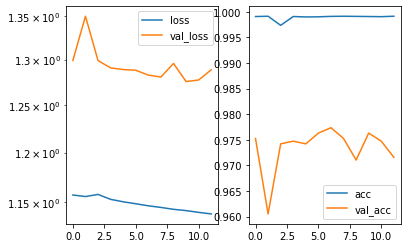

Predicted cell: MacroCheate Probability: [[0.5984474]]
True Cell type: MatureP1
X [[0.29610234]]
True positional value X 0.3148148148148148
Y [[0.5142701]]
True positional value Y 0.6851851851851852
H [[0.30068403]]
True positional value H 0.35185185185185186
W [[0.28865305]]
True positional value W 0.4074074074074074


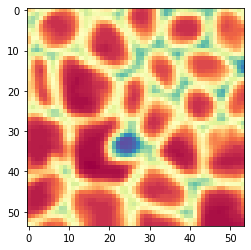

Epoch 13/250
36076/36076 [==============================] - 47s 1ms/step - loss: 1.1388 - acc: 0.9978 - val_loss: 1.2953 - val_acc: 0.9721

Epoch 00013: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d29V0.h5
{'val_loss': 1.295289490585769, 'val_acc': 0.9720905817703801, 'loss': 1.1388487862250614, 'acc': 0.9977824613675004, 'lr': 1e-04}


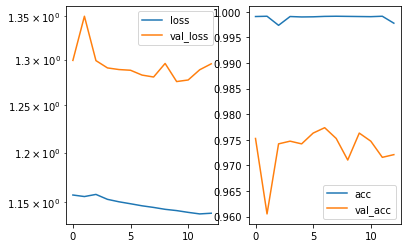

Predicted cell: Normal Probability: [[0.67310715]]
True Cell type: NonMatureP1
X [[0.36764815]]
True positional value X 0.3148148148148148
Y [[0.42332453]]
True positional value Y 0.5
H [[0.18836279]]
True positional value H 0.3333333333333333
W [[0.29664725]]
True positional value W 0.3888888888888889


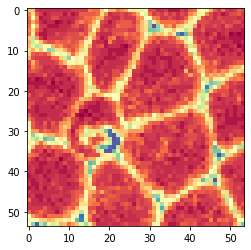

Epoch 14/250
36076/36076 [==============================] - 47s 1ms/step - loss: 1.1422 - acc: 0.9966 - val_loss: 1.3250 - val_acc: 0.9568

Epoch 00014: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d29V0.h5
{'val_loss': 1.32498172228433, 'val_acc': 0.9568193832028847, 'loss': 1.1421801553807194, 'acc': 0.9965905341873122, 'lr': 1e-04}


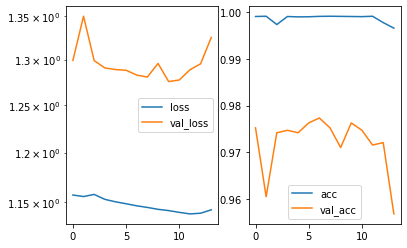

Predicted cell: MatureP1 Probability: [[0.99999547]]
True Cell type: MatureP1
X [[0.3483767]]
True positional value X 0.5
Y [[0.33723694]]
True positional value Y 0.5
H [[0.25216693]]
True positional value H 0.35185185185185186
W [[0.20822105]]
True positional value W 0.3148148148148148


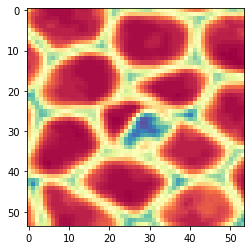

Epoch 15/250
36076/36076 [==============================] - 47s 1ms/step - loss: 1.1346 - acc: 0.9988 - val_loss: 1.3081 - val_acc: 0.9652

Epoch 00015: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d29V0.h5
{'val_loss': 1.3081369521807469, 'val_acc': 0.9652448737539701, 'loss': 1.1346335579199305, 'acc': 0.9988080729850315, 'lr': 1e-04}


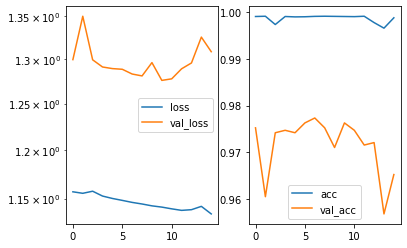

Predicted cell: MatureP1 Probability: [[0.9986998]]
True Cell type: MatureP1
X [[0.47222966]]
True positional value X 0.6851851851851852
Y [[0.4968605]]
True positional value Y 0.6851851851851852
H [[0.32091752]]
True positional value H 0.48148148148148145
W [[0.31015387]]
True positional value W 0.35185185185185186


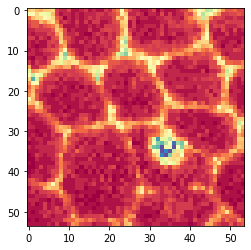

Epoch 16/250
36076/36076 [==============================] - 47s 1ms/step - loss: 1.1316 - acc: 0.9992 - val_loss: 1.2738 - val_acc: 0.9742

Epoch 00016: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d29V0.h5
{'val_loss': 1.2738345272607587, 'val_acc': 0.9741969599166376, 'loss': 1.1316432383599997, 'acc': 0.9991684230128126, 'lr': 1e-04}


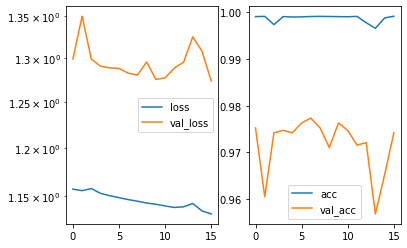

Predicted cell: MatureP1 Probability: [[0.9999994]]
True Cell type: MatureP1
X [[0.5198835]]
True positional value X 0.6851851851851852
Y [[0.5538173]]
True positional value Y 0.6851851851851852
H [[0.29102358]]
True positional value H 0.3333333333333333
W [[0.24765067]]
True positional value W 0.25925925925925924


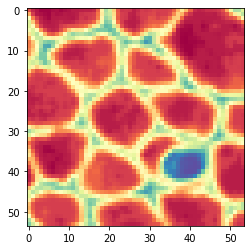

Epoch 17/250
36076/36076 [==============================] - 47s 1ms/step - loss: 1.1295 - acc: 0.9992 - val_loss: 1.2690 - val_acc: 0.9758

Epoch 00017: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d29V0.h5
{'val_loss': 1.2690290243390863, 'val_acc': 0.9757767372410068, 'loss': 1.1294595321142855, 'acc': 0.9992238614786252, 'lr': 1e-04}


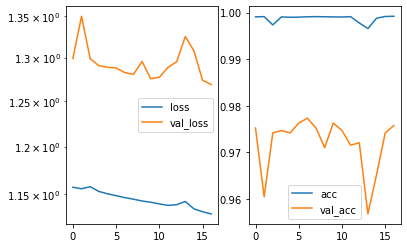

Predicted cell: MatureP1 Probability: [[0.9999634]]
True Cell type: MatureP1
X [[0.47679096]]
True positional value X 0.6851851851851852
Y [[0.50619715]]
True positional value Y 0.6851851851851852
H [[0.20676279]]
True positional value H 0.18518518518518517
W [[0.39024052]]
True positional value W 0.25925925925925924


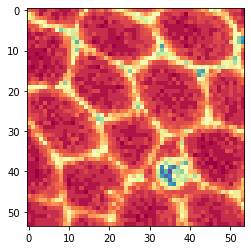

Epoch 18/250
36076/36076 [==============================] - 47s 1ms/step - loss: 1.1280 - acc: 0.9991 - val_loss: 1.2679 - val_acc: 0.9774

Epoch 00018: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d29V0.h5
{'val_loss': 1.2679207063210896, 'val_acc': 0.9773565156011597, 'loss': 1.1280004982541731, 'acc': 0.9991407037799064, 'lr': 1e-04}


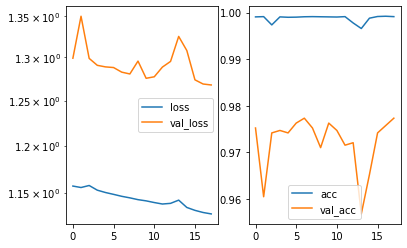

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.33489984]]
True positional value X 0.5
Y [[0.5707718]]
True positional value Y 0.6851851851851852
H [[0.4500702]]
True positional value H 0.5185185185185185
W [[0.48856884]]
True positional value W 0.5185185185185185


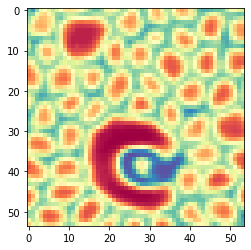

Epoch 19/250
36076/36076 [==============================] - 47s 1ms/step - loss: 1.1264 - acc: 0.9992 - val_loss: 1.2674 - val_acc: 0.9747

Epoch 00019: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d29V0.h5
{'val_loss': 1.2674387350027156, 'val_acc': 0.9747235481835718, 'loss': 1.1264215901945076, 'acc': 0.9991684229665512, 'lr': 1e-04}


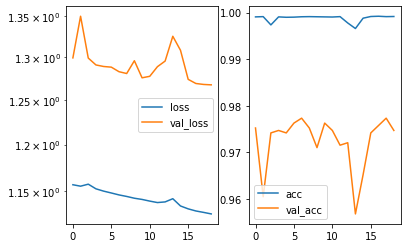

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.51682]]
True positional value X 0.5
Y [[0.360693]]
True positional value Y 0.5
H [[0.39889702]]
True positional value H 0.14814814814814814
W [[0.3112977]]
True positional value W 0.09259259259259259


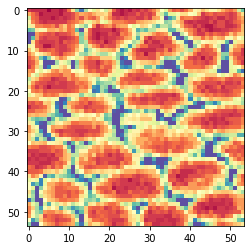

Epoch 20/250
36076/36076 [==============================] - 47s 1ms/step - loss: 1.1247 - acc: 0.9992 - val_loss: 1.2738 - val_acc: 0.9731

Epoch 00020: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d29V0.h5
{'val_loss': 1.273823434896002, 'val_acc': 0.9731437708592026, 'loss': 1.1247408723392354, 'acc': 0.9991684230128126, 'lr': 1e-04}


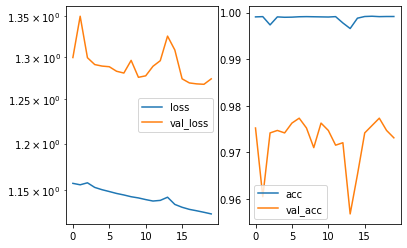

Predicted cell: MatureP1 Probability: [[0.9999975]]
True Cell type: MatureP1
X [[0.5093144]]
True positional value X 0.6851851851851852
Y [[0.39056838]]
True positional value Y 0.5
H [[0.32508796]]
True positional value H 0.3333333333333333
W [[0.31882164]]
True positional value W 0.24074074074074073


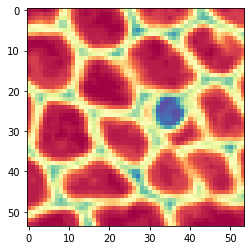

Epoch 21/250
36076/36076 [==============================] - 47s 1ms/step - loss: 1.1225 - acc: 0.9993 - val_loss: 1.2600 - val_acc: 0.9763

Epoch 00021: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d29V0.h5
{'val_loss': 1.2600138093246291, 'val_acc': 0.9763033286466795, 'loss': 1.1225470516499003, 'acc': 0.9992515807115314, 'lr': 1e-04}


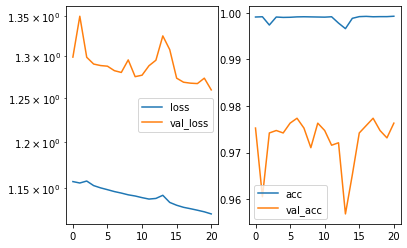

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.495401]]
True positional value X 0.5
Y [[0.3145445]]
True positional value Y 0.5
H [[0.15114912]]
True positional value H 0.18518518518518517
W [[0.19714534]]
True positional value W 0.18518518518518517


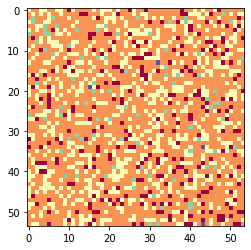

Epoch 22/250
36076/36076 [==============================] - 47s 1ms/step - loss: 1.1211 - acc: 0.9993 - val_loss: 1.2588 - val_acc: 0.9768

Epoch 00022: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d29V0.h5
{'val_loss': 1.2588145329237863, 'val_acc': 0.9768299221239195, 'loss': 1.121109900631573, 'acc': 0.9992515807115314, 'lr': 1e-04}


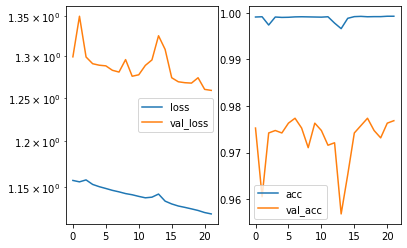

Predicted cell: MatureP1 Probability: [[0.99976796]]
True Cell type: MatureP1
X [[0.3338941]]
True positional value X 0.3148148148148148
Y [[0.24148814]]
True positional value Y 0.3148148148148148
H [[0.25333893]]
True positional value H 0.3888888888888889
W [[0.2911799]]
True positional value W 0.3148148148148148


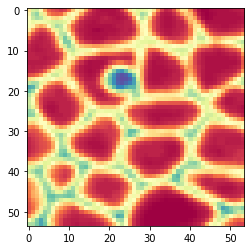

Epoch 23/250
 2800/36076 [=>............................] - ETA: 42s - loss: 1.1192 - acc: 0.9993

KeyboardInterrupt: 

In [5]:
Train = NEATStaticDetection(config, NpzDirectory,KeyCategories, KeyCord,TrainModelName,ValidationModelName, ModelDir, Model_Name, show = show, yoloV0 = yoloV0)

Train.loadData()

Train.TrainModel()
